# Multiple Linear Regression

### 1. Performing EDA

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('ToyotaCorolla - MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
data.describe(include='all')

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.947075,68533.259749,NaN,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,NaN,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000


In [7]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


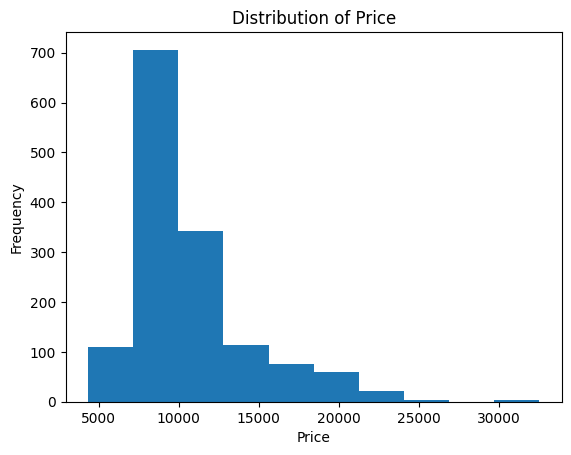

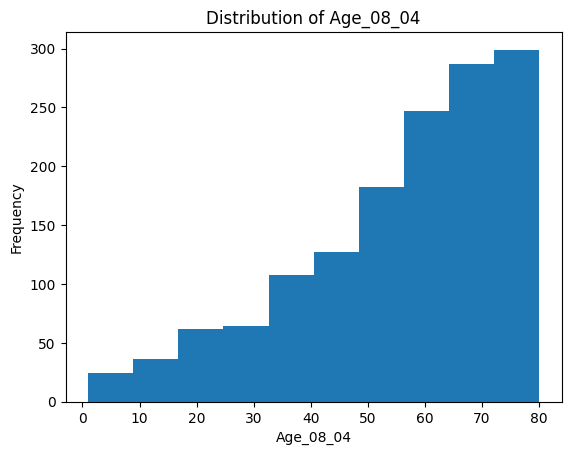

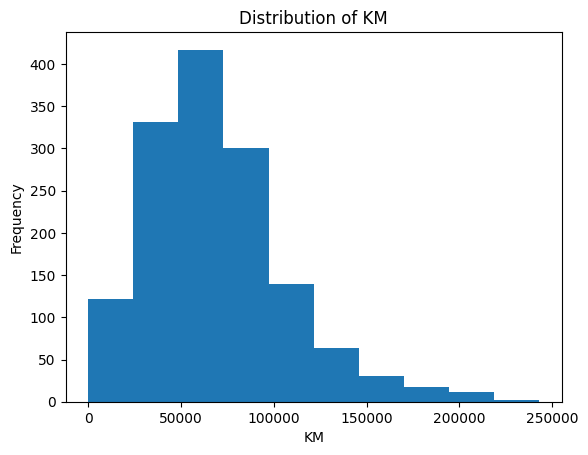

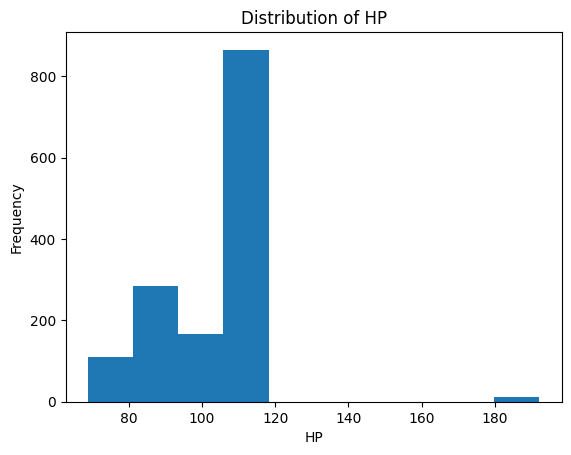

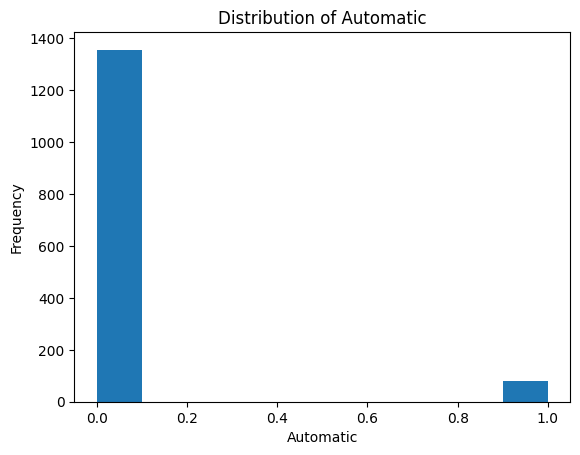

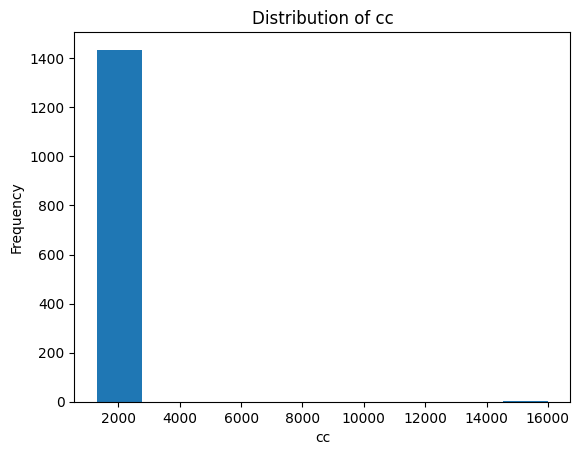

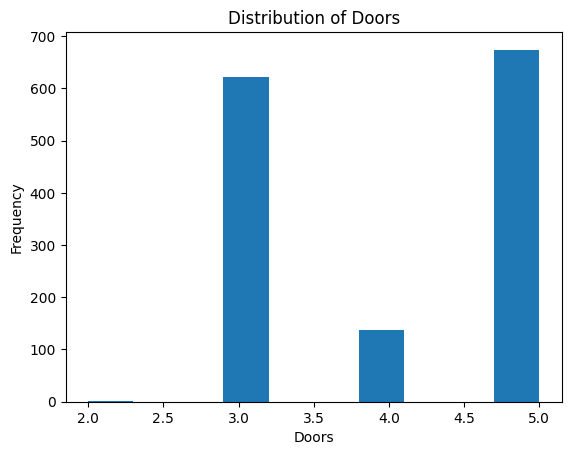

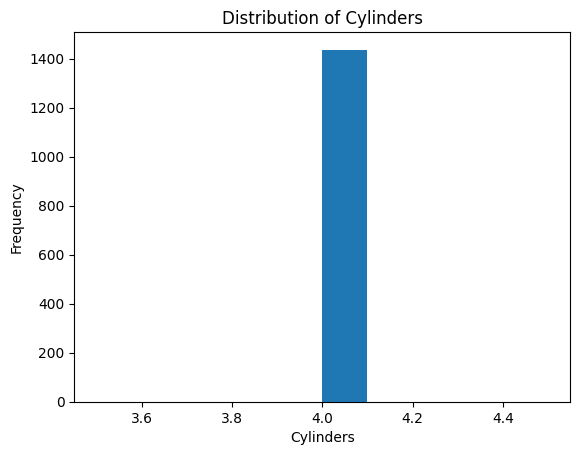

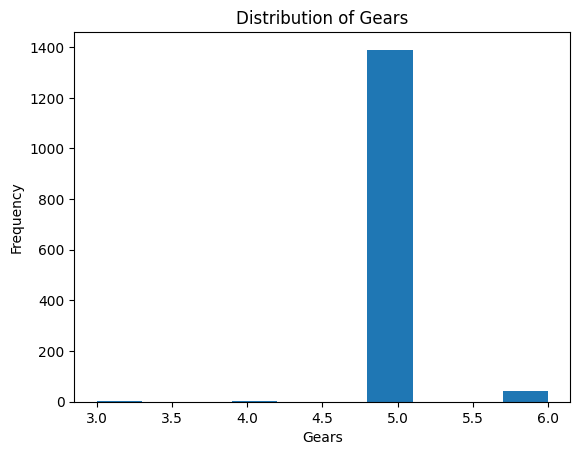

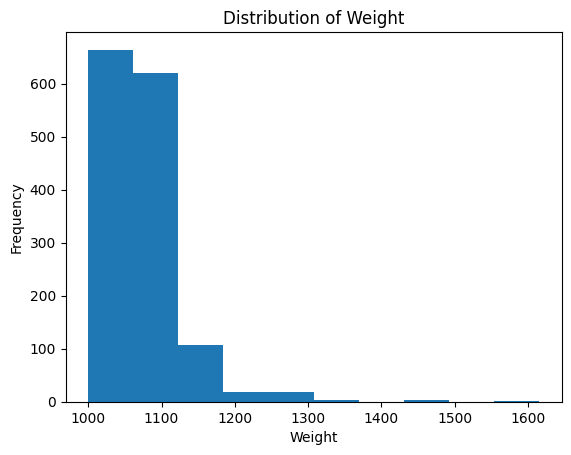

In [8]:
#plotting histograms
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
  plt.figure()
  plt.hist(data[col])
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

In [9]:
#count plot for categorical variables
data['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,1264
Diesel,155
CNG,17


In [14]:
# Pre-Processing

#one-hot encoding for fuel_type
df_encoded = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

#defining X and Y
X = df_encoded.drop('Price', axis=1)
Y = df_encoded['Price']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 2. Splitting the dataset into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


### 3. Building a Multiple Linear Regression Model using training dataset.

In [21]:
# Model 1
from sklearn.linear_model import LinearRegression

features1 = ["Age_08_04", "KM", "HP"]
X1 = X_train[:, [list(X.columns).index(col) for col in features1]]
X1_test = X_test[:, [list(X.columns).index(col) for col in  features1]]

model1 = LinearRegression()
model1.fit(X1, Y_train)

coeff1 = pd.DataFrame({
    "Features" : ["Age", "KM", "HP"],
    "Coefficients" : model1.coef_
})

coeff1

,Features,Coefficients
0,Age,-2857.752270
1,KM,-424.180930
2,HP,519.242589


In [22]:
# Model - 2
features2 = ["Age_08_04", "KM", "HP", "Weight", "Automatic"]

X2 = X_train[:, [list(X.columns).index(col) for col in features2]]
X2_test = X_test[:, [list(X.columns).index(col) for col in features2]]

model2 = LinearRegression()
model2.fit(X2, Y_train)

coeff2 = pd.DataFrame({
    "Features" : ["Age", "KM", "HP", "Weight", "Automatic"],
    "Coefficients" : model2.coef_
})

coeff2

,Features,Coefficients
0,Age,-2245.337031
1,KM,-745.754280
2,HP,437.005773
3,Weight,1028.955433
4,Automatic,67.990444


In [23]:
# Model - 3
model3 = LinearRegression()
model3.fit(X_train, Y_train)

coeff3 = pd.DataFrame({
    "Features" : X.columns,
    "Coefficients" : model3.coef_
})

coeff3

,Features,Coefficients
0,Age_08_04,-2.246662e+03
1,KM,-6.085706e+02
2,HP,2.102533e+02
3,Automatic,3.413608e+01
4,cc,-1.288507e+01
5,Doors,-5.743684e+01
6,Cylinders,2.842171e-13
7,Gears,1.039463e+02
8,Weight,1.362139e+03
9,Fuel_Type_Diesel,-2.127088e+01


### 4. Evaluating the performance of the model using appropriate evaluation metrics on the testing dataset.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model3.predict(X_test)

#Evaluation Metrics
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print("R Squared Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

R Squared Score: 0.834888804061108
Mean Squared Error: 2203043.823143705
Mean Absolute Error: 990.8872739193968
Root Mean Squared Error: 1484.2654153296521


### 5. Applying Lasso and Ridge Methods

In [28]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

y_pred_ridge = ridge.predict(X_test)

#Evaluation
r2_ridge = r2_score(Y_test, y_pred_ridge)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(Y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("R Squared Score (Ridge):", r2_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("Mean Absolute Error (Ridge):", mae_ridge)
print("Root Mean Squared Error (Ridge):", rmse_ridge)

#Coefficients
ridge_coeff = pd.DataFrame({
    "Features" : X.columns,
    "Coefficients" : ridge.coef_
})

ridge_coeff

R Squared Score (Ridge): 0.8350658145414687
Mean Squared Error (Ridge): 2200682.0096811303
Mean Absolute Error (Ridge): 990.8667646951048
Root Mean Squared Error (Ridge): 1483.4695850205794


,Features,Coefficients
0,Age_08_04,-2244.540333
1,KM,-610.243379
2,HP,211.552393
3,Automatic,34.349741
4,cc,-12.749655
5,Doors,-56.548223
6,Cylinders,0.000000
7,Gears,104.054836
8,Weight,1359.382176
9,Fuel_Type_Diesel,-21.825934


In [29]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, Y_train)

y_pred_lasso = lasso.predict(X_test)

# Evaluation
r2_lasso = r2_score(Y_test, y_pred_lasso)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(Y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso R²:", r2_lasso)
print("Lasso MAE:", mae_lasso)
print("Lasso RMSE:", rmse_lasso)


# Coefficients
lasso_coeff = pd.DataFrame({
    "Feature": X.columns,
    "Lasso_Coefficient": lasso.coef_
})

lasso_coeff

Lasso R²: 0.8351214316622071
Lasso MAE: 991.0165150203231
Lasso RMSE: 1483.219445052897


,Feature,Lasso_Coefficient
0,Age_08_04,-2246.476797
1,KM,-609.112901
2,HP,211.386648
3,Automatic,33.563397
4,cc,-11.899937
5,Doors,-55.607966
6,Cylinders,0.000000
7,Gears,103.316003
8,Weight,1357.776407
9,Fuel_Type_Diesel,-18.860253
